# SparseDream Cifar10

## Intro
* **Date**: 12/12/2020
* **What**: Basically, this is the same architecture I settled on in the last experiment, and I'm training it on cifar10 with color to see how well it does reconstructing color images.
* **Why**: Because I want to see how this bad boi does in color.  It's a simple desire.  
* **Hopes**: The network does a fantabulous job doing color reconstruction.
* **Limitations**: I guess the network might treat different color regions differently.  I don't really know what to expect actually.  This will be my first time training one of my networks on something that isn't gray scale.

## Code

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tqdm import tqdm
from scipy.special import expit as sig

(tr_x, _), (te_x, _) = cifar10.load_data()

In [27]:
s_len = 10
slh = s_len // 2
sl2 = s_len * s_len

data = tr_x[:, 16 - slh: 16 + slh, 16 - slh: 16 + slh]
flat_data = data.reshape(-1, sl2 * 3) / 255.0
fd_len = flat_data.shape[0]

te_data = te_x[:, 16 - slh: 16 + slh, 16 - slh: 16 + slh]
te_flat_data = te_data.reshape(-1, sl2 * 3) / 255.0

In [3]:
def draw_color_weights(w, Kx, Ky, fig, s_len):
    tapestry = np.zeros((s_len * Kx, s_len * Ky, 3))
    
    w_i = 0
    for y in range(Ky):
        for x in range(Kx):
            tapestry[y * s_len: (y + 1) * s_len, x * s_len: (x + 1) * s_len] = w[w_i].reshape(s_len, s_len, 3)
            w_i += 1
            
    plt.clf()        
    im = plt.imshow(tapestry)
    plt.axis("off")
    fig.canvas.draw()

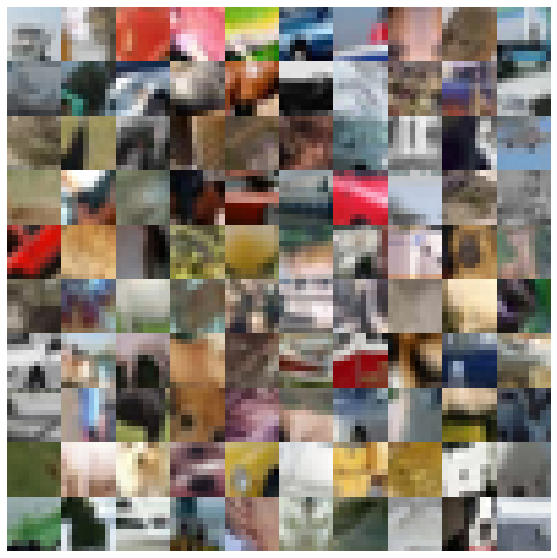

In [4]:
fig = plt.figure(figsize=(10, 10))
offset = 100
draw_color_weights(data[offset:offset + 100].reshape(100, -1) / 255., 10, 10, fig, 10)

Hey look mom!  I got draw_weights to work with color images!  That's pretty neat!!

100%|█████████████████████████████████████████████████████████| 50000/50000 [00:14<00:00, 3545.03it/s]


<IPython.core.display.Javascript object>


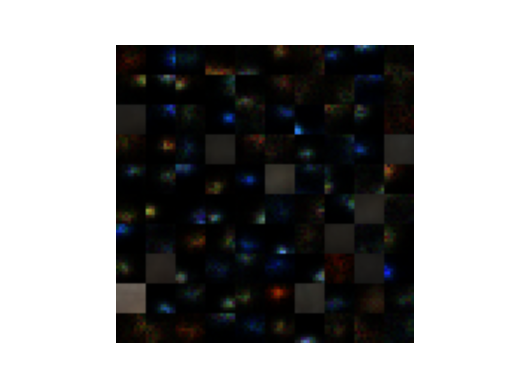

In [44]:
# %matplotlib notebook
# fig = plt.figure(figsize=(12, 12))

Nep = 1
T_s = 50000
Kx = 10
Ky = 10
N = Kx * Ky
xi = 0.02
prec = 1e-10

w = np.random.uniform(0.1, 1, (N, sl2 * 3))
t = np.zeros((N, 1))
sp = 0.05
gamma = 0.01

for ep in range(Nep):
    inputs = flat_data[np.random.permutation(fd_len)]
    for i in tqdm(range(T_s)):
        v = inputs[i].reshape(-1, 1)
#         print(v.shape, w.shape, t.shape)
        o = sig((w @ v) - t)
        r = w.T @ o
        mod_r = np.maximum(r, prec)
        e = v - r
        
        w += w * o * (e / mod_r).T * xi
        t += (o - sp) * gamma
        
        if i % 100 == 0:
            w = np.where(w > prec, w, 0)

    draw_color_weights(w, Kx, Ky, fig, s_len)

Ok, that's actually super super dope.  

## Analysis Dialog

Alright.  I don't see a single reason why I shouldn't just go for it, so I'm going to just go ahead and do 900 neurons, trained on 10 epochs.  This might take a bit.

<IPython.core.display.Javascript object>


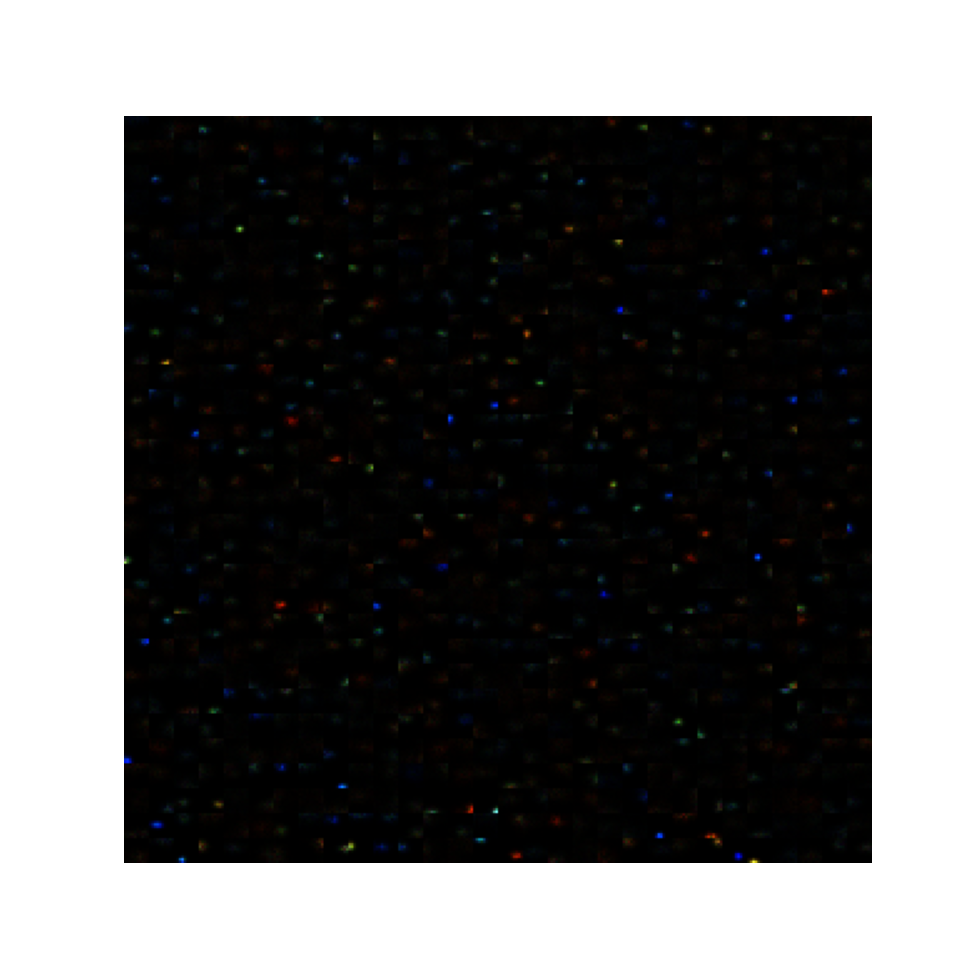

100%|██████████████████████████████████████████████████████████| 50000/50000 [03:13<00:00, 258.76it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [5]:
%matplotlib notebook
fig = plt.figure(figsize=(12, 12))

Nep = 3
T_s = 50000
Kx = 30
Ky = 30
N = Kx * Ky
xi = 0.02
prec = 1e-10

w = np.random.uniform(0.1, 1, (N, sl2 * 3))
t = np.zeros((N, 1))
sp = 0.05
gamma = 0.01

for ep in range(Nep):
    inputs = flat_data[np.random.permutation(fd_len)]
    for i in tqdm(range(T_s)):
        v = inputs[i].reshape(-1, 1)
        o = sig((w @ v) - t)
        r = w.T @ o
        mod_r = np.maximum(r, prec)
        e = v - r
        
        w += w * o * (e / mod_r).T * xi
        t += (o - sp) * gamma
        
        if i % 100 == 0:
            w = np.where(w > prec, w, 0)

    draw_color_weights(w, Kx, Ky, fig, s_len)

I started with just 3 epochs cause of how long it's taking, but now I'm watching a Cameron Hanes video, so I think I just bust this bad boi for another 7 epochs.

<IPython.core.display.Javascript object>


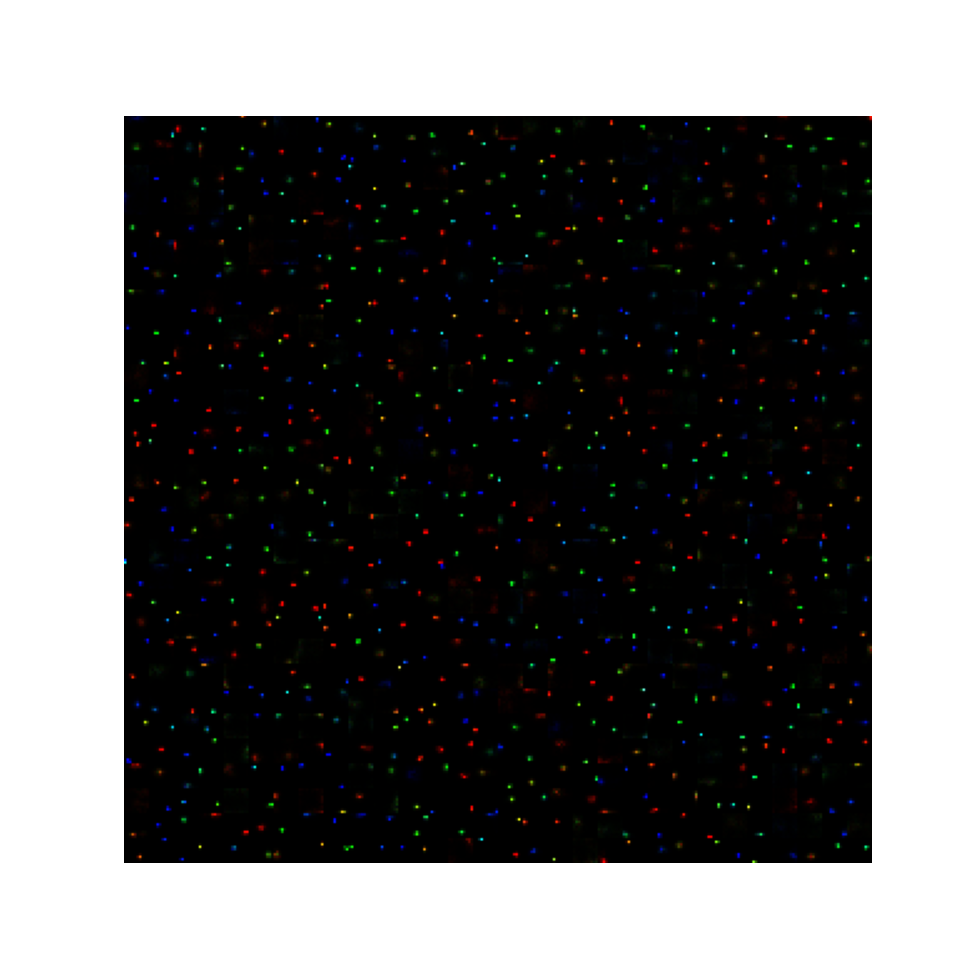

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████████████████████████████████████████████████████| 50000/50000 [03:13<00:00, 258.03it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████████████████████████████████████████████████████| 50000/50000 [03:13<00:00, 258.57it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████████████████████████████████████████████████████| 50000/50000 [03:13<00:00, 258.90it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████████████████████████████████████████████████████| 50000/50000 [03:12<00:00, 259.16it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|█████████████████████████████████

In [6]:
%matplotlib notebook
fig = plt.figure(figsize=(12, 12))

Nep = 7
T_s = 50000

draw_color_weights(w, Kx, Ky, fig, s_len)
for ep in range(Nep):
    inputs = flat_data[np.random.permutation(fd_len)]
    for i in tqdm(range(T_s)):
        v = inputs[i].reshape(-1, 1)
        o = sig((w @ v) - t)
        r = w.T @ o
        mod_r = np.maximum(r, prec)
        e = v - r
        
        w += w * o * (e / mod_r).T * xi
        t += (o - sp) * gamma
        
        if i % 100 == 0:
            w = np.where(w > prec, w, 0)

    draw_color_weights(w, Kx, Ky, fig, s_len)

Look at that!  It's like frikin Christmas come early. That looks great!  Time to do some reconstructions.

In [8]:
w900 = w
t900 = t

<IPython.core.display.Javascript object>


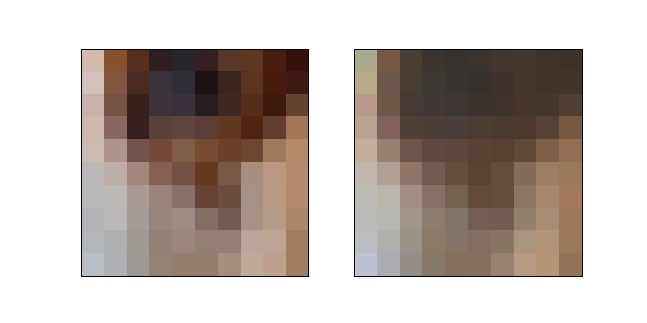

In [10]:
img_i = 426

img = flat_data[img_i]

v = img.reshape(-1, 1)
o = sig((w900 @ v) - t900)
r = w900.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len, 3))

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len, 3))

plt.show()

<IPython.core.display.Javascript object>


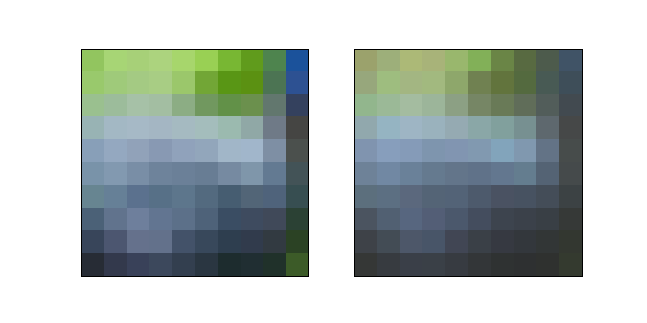

In [18]:
img_i = 6

img = flat_data[img_i]

v = img.reshape(-1, 1)
o = sig((w900 @ v) - t900)
r = w900.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len, 3))

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len, 3))

plt.show()

<IPython.core.display.Javascript object>


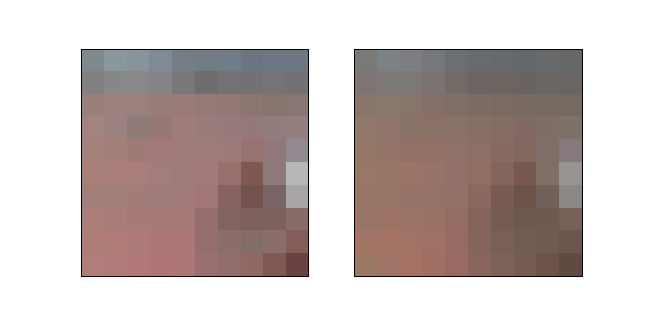

In [21]:
img_i = 4230

img = flat_data[img_i]

v = img.reshape(-1, 1)
o = sig((w900 @ v) - t900)
r = w900.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len, 3))

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len, 3))

plt.show()

Those reconstructions are looking pretty good!  You know, I should really do some reconstructions from the test data...

<IPython.core.display.Javascript object>


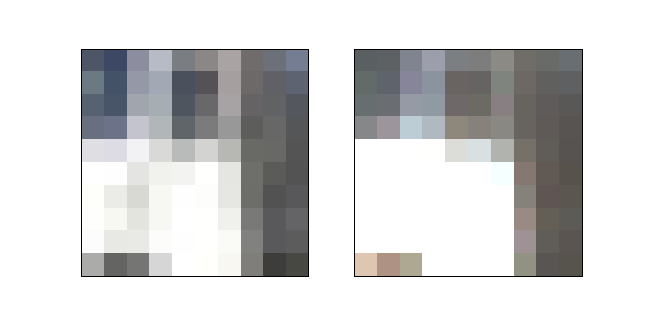

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [31]:
img_i = 45

img = te_flat_data[img_i]

v = img.reshape(-1, 1)
o = sig((w900 @ v) - t900)
r = w900.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len, 3))

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len, 3))

plt.show()

<IPython.core.display.Javascript object>


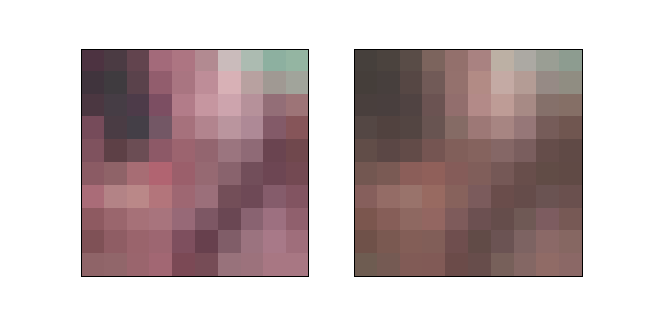

In [32]:
img_i = 101

img = te_flat_data[img_i]

v = img.reshape(-1, 1)
o = sig((w900 @ v) - t900)
r = w900.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len, 3))

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len, 3))

plt.show()

<IPython.core.display.Javascript object>


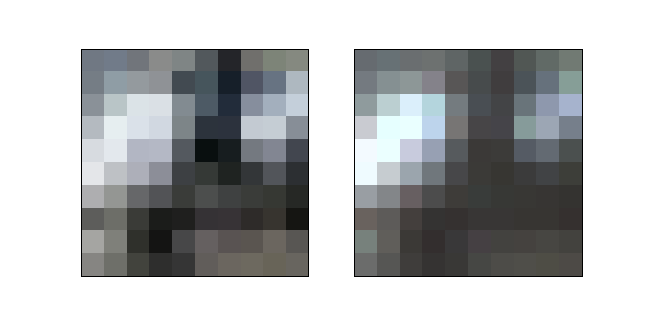

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [34]:
img_i = 8091

img = te_flat_data[img_i]

v = img.reshape(-1, 1)
o = sig((w900 @ v) - t900)
r = w900.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len, 3))

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len, 3))

plt.show()

Yeah, I mean I only have my eyes, but it seems like it's doing pretty frikin well.  I certainly like what I see.  Man, I'd really love to see this one trained topologically, because we might get structure clustering and color clustering.  It'd be like that one slide from VS265.  Ok, before I finish out this experiment, I'm going to train the network again, but this time with a smaller sparsity.  This current architecture should have about 45 neurons activated on average.  Now, I'm going to lower that down to 15.  We'll see what happens.  10 epochs baby.  Probably should mini-batch this, but hey, I already mentioned I'm binging Cam Hanes's YouTube channel.

<IPython.core.display.Javascript object>


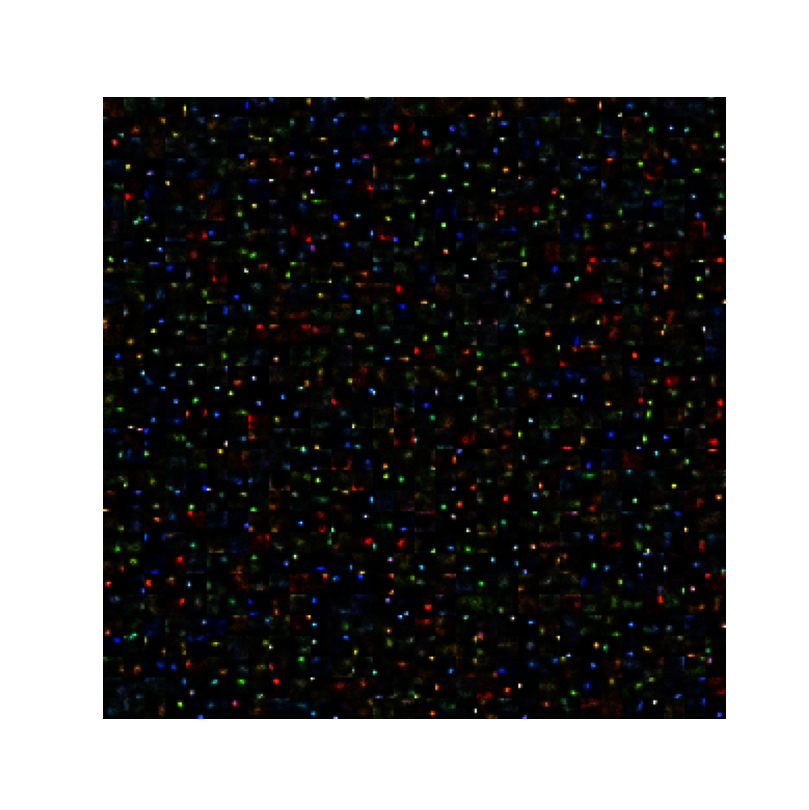

100%|██████████████████████████████████████████████████████████| 50000/50000 [03:17<00:00, 253.11it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████████████████████████████████████████████████████| 50000/50000 [03:17<00:00, 252.82it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████████████████████████████████████████████████████| 50000/50000 [03:16<00:00, 254.07it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████████████████████████████████████████████████████| 50000/50000 [03:15<00:00, 255.54it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████████████████████████████████████████████████████| 50000/50000 [03:14<00:00, 256.41it/s]
Clipping input data to the valid range for im

In [36]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

Nep = 10
T_s = 50000
Kx = 30
Ky = 30
N = Kx * Ky
xi = 0.02
prec = 1e-10

w = np.random.uniform(0.1, 1, (N, sl2 * 3))
t = np.zeros((N, 1))
sp = 0.016
gamma = 0.01

for ep in range(Nep):
    inputs = flat_data[np.random.permutation(fd_len)]
    for i in tqdm(range(T_s)):
        v = inputs[i].reshape(-1, 1)
        o = sig((w @ v) - t)
        r = w.T @ o
        mod_r = np.maximum(r, prec)
        e = v - r
        
        w += w * o * (e / mod_r).T * xi
        t += (o - sp) * gamma
        
        if i % 100 == 0:
            w = np.where(w > prec, w, 0)

    draw_color_weights(w, Kx, Ky, fig, s_len)

HMMMMMMM... Interesting.  I mean, it's not like that isn't expected.  Let's do some reconstructions.

In [37]:
w9 = w
t9 = t

<IPython.core.display.Javascript object>


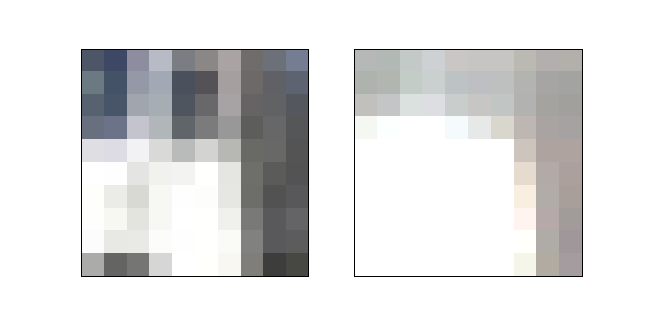

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [38]:
img_i = 45

img = te_flat_data[img_i]

v = img.reshape(-1, 1)
o = sig((w9 @ v) - t9)
r = w9.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len, 3))

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len, 3))

plt.show()

<IPython.core.display.Javascript object>


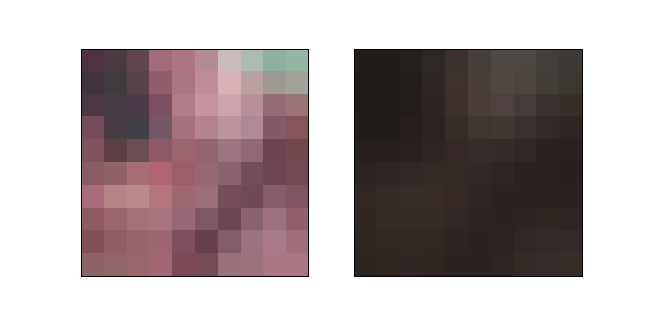

In [39]:
img_i = 101

img = te_flat_data[img_i]

v = img.reshape(-1, 1)
o = sig((w9 @ v) - t9)
r = w9.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len, 3))

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len, 3))

plt.show()

<IPython.core.display.Javascript object>


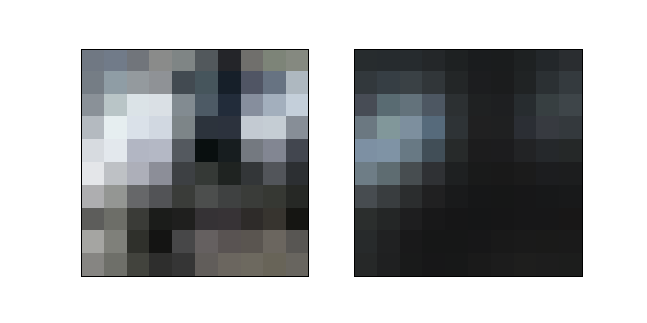

In [40]:
img_i = 8091

img = te_flat_data[img_i]

v = img.reshape(-1, 1)
o = sig((w9 @ v) - t9)
r = w9.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len, 3))

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len, 3))

plt.show()

<IPython.core.display.Javascript object>


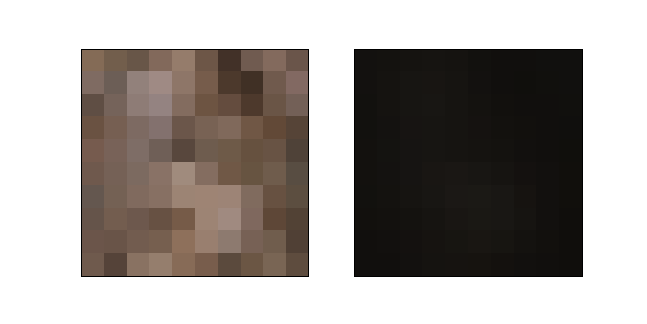

In [41]:
img_i = 8102

img = te_flat_data[img_i]

v = img.reshape(-1, 1)
o = sig((w9 @ v) - t9)
r = w9.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len, 3))

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len, 3))

plt.show()

<IPython.core.display.Javascript object>


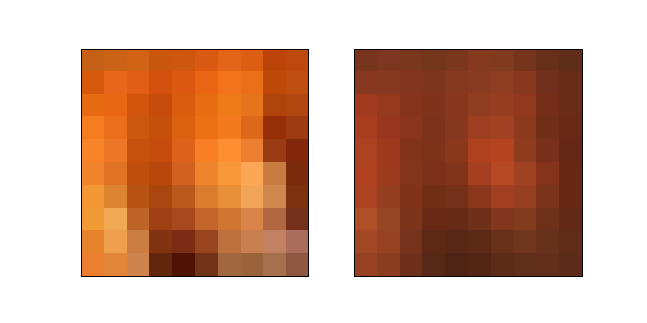

In [47]:
img_i = 110

img = te_flat_data[img_i]

v = img.reshape(-1, 1)
o = sig((w9 @ v) - t9)
r = w9.T @ o

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(img.reshape(s_len, s_len, 3))

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(r.reshape(s_len, s_len, 3))

plt.show()

Well, ok.  Yeah, there are definitely some bad reconstructions in there.  There are a couple like fig 5, where the reconstruction is all black.  That's actually super interesting.  That being said, V1 is so incredibly over-complete that it probably behaves a bit more like the 45-firing network rather than the 15-firing network.  

Also, training this bad boi is sooooo slooooowwww.  I'm going to transfer operations over to an AWS instance with a phat GPU.  I gots to get that bad boi involved.  Maybe tensorflow as well.  IDK. 

## Conclusions

In many ways, this is super dope.  I love that these reconstructions are in color.  I don't really have anything quantitative to say about what we're seeing here, other than it's pretty cool.  As I mentioned earlier, I'm super super stoked to train this topographically, meaning that I'd insert local excitatory connections between the neurons in the hidden layer.  I'm hoping I'd start to see some awesome local connections.  In a perfect world, it'd look like that one diagram of V1 that Bruno showed the class in VS265.  That'd be the literal sauce.

## Next Steps

There are basically three more things I need to figure out about this setup.  First things first, I need to see what happens if I add some local excitatory connections in the hidden layer to stimulate topological learning, ie features that are related are closer to one another.  Second things second, I need to get some global inhibition in there, son.  I'm not actually even sure what it'd do, because the sparsity is kinda acting like competition already.  Maybe I'd get more precise competition.  It'd be interesting to train that on MNIST, because you'd get competition from the lateral inhibition, but you'd ensure sparsity because of the sparsity factor.

Finally, this is intimately related to the two points I've already discussed, but I need to figure out how I can get this bad boi to start behaving like a Hopfield network.  I think it might just kinda happen, but it would be super super dope for the network to fall into energy basins that correspond to interesting structure.  

But, I mean if Hopfield's math is to be believed, Hebbian learning might just kinda automagically make that happen if I have lateral excitation.  Also global lateral inhibition might stimulate a sort of localizing effect wherein local regions of the network behave like Hopfield networks.  That'd be really great.  

Now then, let's talk hardware.  Because Jupyter is the illest shit this side of the Mississippi, I could run a kernel on AWS in Ohio, and program in real-time here.  Gosh that's literally delicious. I might have to mess with the security groups to deal with IO traffic, but idk. I think they might use a websocket that literally gets around firewall.  How that works is simply beyond me.  Well, it's not beyond me, but I still don't have a great feel for why you can ensure it's security.  Anyway, that's not important.  What's important is speeding this bad boi up.  

I also think it's time to start groovy on the ol FPGA.  They're undoubtedly in my future anyway, so I might as well start grinding implementations out.  I got to get my mushy Von Neumann architecture-centric brain to start thinking in terms of parallel hardware, cause that's why this algorithm would be the juice.  But I already know that.  Yeah, so let's invest (non-monetarily) in some dope hardware skillz.  That's going to be great.